## Setup

In [1]:
from UTILITY_quickstart import *  
from tabulate import tabulate


importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline2.yml")  

#New DL10 centering 
importedDefaultSettings = importedDefaultSettings | {"centerDL10" : True}

#Disable BC14 centering
importedDefaultSettings = importedDefaultSettings | { "centerBC14" : False }

#Center sextupoles for simplicity. We're looking at BEGBC20 anyway; this just keeps the tracking happier
importedDefaultSettings = importedDefaultSettings | {
    "S1EL_xOffset" : 0.0,
    "S1EL_yOffset" : 0.0,
    "S2EL_xOffset" : 0.0,
    "S2EL_yOffset" : 0.0,
    "S2ER_xOffset" : 0.0,
    "S2ER_yOffset" : 0.0,
    "S1ER_xOffset" : 0.0,
    "S1ER_yOffset" : 0.0,
}

In [2]:
csrTF           = True 
transverseWakes = True 

evalElement = "Q19501"   
inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"] 
bunchCount = importedDefaultSettings["bunchCount"] 

tao = initializeTao(     
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,          
    csrTF = csrTF,     
    numMacroParticles=1e5,     
    scratchPath = "/tmp",     
    randomizeFileNames = True,      
    transverseWakes = transverseWakes 
)


totalNumElements = len(tao.lat_list("*", "ele.name"))

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Transverse wakes enabled!
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 100000.0
Beam created, written to /tmp/beams/activeBeamFile_4110266557001429250.h5, and reinit to tao


In [3]:
# For simplicity, disable all apertures. Very nonphysical, but the single particle tracking failure is causing problems

# for eleII in range(totalNumElements):
#     try:
#         tao.cmd(f"set ele {eleII} APERTURE_AT = NO_APERTURE")
#     except:
#         pass

In [4]:
trackBeam(tao, 
          trackEnd = "L0BFEND", 
          verbose = True
         ) 
PInit = getBeamAtElement(tao, "L0AFEND")

artificialFactor = 1.3 
#artificialFactor = 1.0 
PInit.x = artificialFactor * PInit.x 
PInit.px = artificialFactor * PInit.px 
PInit.y = artificialFactor * PInit.y 
PInit.py = artificialFactor * PInit.py  

makeBeamActiveBeamFile(PInit, tao = tao)

Loaded /tmp/beams/activeBeamFile_4110266557001429250.h5
Set track_start = L0AFEND, track_end = L0BFEND
Tracking!
trackBeam() exiting


In [5]:
#tao.lat_list("K*", "ele.name", flags="-no_slaves")
# Manually pared from above
linacsToPerturb = ['K11_4A', 'K11_4B', 'K11_4C', 'K11_4D', 'K11_5A', 'K11_5B', 'K11_5C', 'K11_5D', 'K11_6A', 'K11_6B', 'K11_6C', 'K11_6D', 'K11_7A', 'K11_7B', 'K11_7C', 'K11_7D', 'K11_8A', 'K11_8B', 'K11_8C', 'K11_8D', 'K12_1A', 'K12_1B', 'K12_1C', 'K12_1D', 'K12_2A', 'K12_2B', 'K12_2C', 'K12_2D', 'K12_3A', 'K12_3B', 'K12_3C', 'K12_3D', 'K12_4A', 'K12_4B', 'K12_4C', 'K12_4D', 'K12_5A', 'K12_5B', 'K12_5C', 'K12_5D', 'K12_6A', 'K12_6B', 'K12_6C', 'K12_6D', 'K12_7A', 'K12_7B', 'K12_7C', 'K12_7D', 'K12_8A', 'K12_8B', 'K12_8C', 'K12_8D', 'K13_1A', 'K13_1B', 'K13_1C', 'K13_1D', 'K13_2A', 'K13_2B', 'K13_2C', 'K13_2D', 'K13_3A', 'K13_3B', 'K13_3C', 'K13_3D', 'K13_4A', 'K13_4B', 'K13_4C', 'K13_4D', 'K13_5A', 'K13_5B', 'K13_5C', 'K13_5D', 'K13_6A', 'K13_6B', 'K13_6C', 'K13_6D', 'K13_7A', 'K13_7B', 'K13_7C', 'K13_7D', 'K13_8A', 'K13_8B', 'K13_8C', 'K13_8D', 'K14_1A', 'K14_1B', 'K14_1C', 'K14_1D', 'K14_2A', 'K14_2B', 'K14_2C', 'K14_2D', 'K14_3A', 'K14_3B', 'K14_3C', 'K14_3D', 'K14_4A', 'K14_4B', 'K14_4C', 'K14_4D', 'K14_5A', 'K14_5B', 'K14_5C', 'K14_5D', 'K14_6A', 'K14_6B', 'K14_6C', 'K14_6D', 'K15_1A', 'K15_1B', 'K15_1C', 'K15_1D', 'K15_2A', 'K15_2B', 'K15_2C', 'K15_3A', 'K15_3B', 'K15_3C', 'K15_3D', 'K15_4A', 'K15_4B', 'K15_4C', 'K15_4D', 'K15_5A', 'K15_5B', 'K15_5C', 'K15_5D', 'K15_6A', 'K15_6B', 'K15_6C', 'K15_6D', 'K15_7A', 'K15_7B', 'K15_7C', 'K15_7D', 'K15_8A', 'K15_8B', 'K15_8C', 'K15_8D', 'K16_1A', 'K16_1B', 'K16_1C', 'K16_1D', 'K16_2A', 'K16_2B', 'K16_2C', 'K16_2D', 'K16_3A', 'K16_3B', 'K16_3C', 'K16_3D', 'K16_4A', 'K16_4B', 'K16_4C', 'K16_4D', 'K16_5A', 'K16_5B', 'K16_5C', 'K16_5D', 'K16_6A', 'K16_6B', 'K16_6C', 'K16_6D', 'K16_7A', 'K16_7B', 'K16_7C', 'K16_7D', 'K16_8A', 'K16_8B', 'K16_8C', 'K16_8D', 'K17_1A', 'K17_1B', 'K17_1C', 'K17_1D', 'K17_2A', 'K17_2B', 'K17_2C', 'K17_2D', 'K17_3A', 'K17_3B', 'K17_3C', 'K17_3D', 'K17_4A', 'K17_4B', 'K17_4C', 'K17_4D', 'K17_5A', 'K17_5B', 'K17_5C', 'K17_5D', 'K17_6A', 'K17_6B', 'K17_6C', 'K17_6D', 'K17_7A', 'K17_7B', 'K17_7C', 'K17_7D', 'K17_8A', 'K17_8B', 'K17_8C', 'K17_8D', 'K18_1A', 'K18_1B', 'K18_1C', 'K18_1D', 'K18_2A', 'K18_2B', 'K18_2C', 'K18_2D', 'K18_3A', 'K18_3B', 'K18_3C', 'K18_3D', 'K18_4A', 'K18_4B', 'K18_4C', 'K18_4D', 'K18_5A', 'K18_5B', 'K18_5C', 'K18_5D', 'K18_6A', 'K18_6B', 'K18_6C', 'K18_6D', 'K18_7A', 'K18_7B', 'K18_7C', 'K18_7D', 'K18_8A', 'K18_8B', 'K18_8C', 'K18_8D', 'K19_1A', 'K19_1B', 'K19_1C', 'K19_1D', 'K19_2A', 'K19_2B', 'K19_2C', 'K19_2D', 'K19_3A', 'K19_3B', 'K19_3C', 'K19_3D', 'K19_4A', 'K19_4B', 'K19_4C', 'K19_4D', 'K19_5A', 'K19_5B', 'K19_5C', 'K19_5D', 'K19_6A', 'K19_6B', 'K19_6C', 'K19_6D', 'K19_8A1', 'K19_8A2', 'K19_8A3']

## Baseline

In [6]:
setLattice(tao, **importedDefaultSettings)

trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_4110266557001429250.h5
Set track_start = L0AFEND, track_end = Q19501
Set track_end = ENDDL10
Tracking!
Beam centered at ENDDL10 written to /tmp/beams/patchBeamFile_4110266557001429250.h5
Loaded /tmp/beams/patchBeamFile_4110266557001429250.h5
Set track_start = ENDDL10, track_end = Q19501
Tracking!
trackBeam() exiting


In [7]:
activeData = {}
for activeEle in  [ "PR10571", "WS12214", "BEGBC14_1", "ENDBC14_2", "Q19501" ]:
    # print(activeEle)
    # print(f"""{getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6:.2f}, {getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6:.2f}""")
    # print()
    activeData[f"{activeEle}_x"] = getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6
    activeData[f"{activeEle}_y"] = getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6

printableData = { key : f"""{activeData[key]:.2f}""" for key in activeData.keys() }

print(tabulate([
    ["PR10571",                  printableData["PR10571_x"], printableData["PR10571_y"]], 
    ["WS12214",                  printableData["WS12214_x"], printableData["WS12214_y"]],
    ["BEGBC14",                  printableData["BEGBC14_1_x"], printableData["BEGBC14_1_y"]],
    ["ENDBC14",                  printableData["ENDBC14_2_x"], printableData["ENDBC14_2_y"]],
    ["Q19501\n(L3 wire proxy)", printableData["Q19501_x"], printableData["Q19501_y"]]
], 
["90% RMS\nemittance (not\nSI90!) [um-rad]", "\n     X     ", "\n     Y     "], 
tablefmt="grid"))

+-------------------+---------------+---------------+
| 90% RMS           |               |               |
| emittance (not    |        X      |        Y      |
| SI90!) [um-rad]   |               |               |
+===================+===============+===============+
| PR10571           |          3.93 |          2.87 |
+-------------------+---------------+---------------+
| WS12214           |          4.55 |          2.75 |
+-------------------+---------------+---------------+
| BEGBC14           |          5.33 |          2.72 |
+-------------------+---------------+---------------+
| ENDBC14           |          6.17 |          2.72 |
+-------------------+---------------+---------------+
| Q19501            |          6.65 |          3.73 |
| (L3 wire proxy)   |               |               |
+-------------------+---------------+---------------+


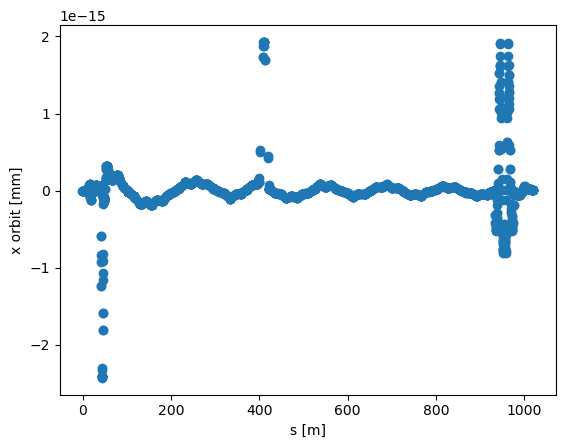

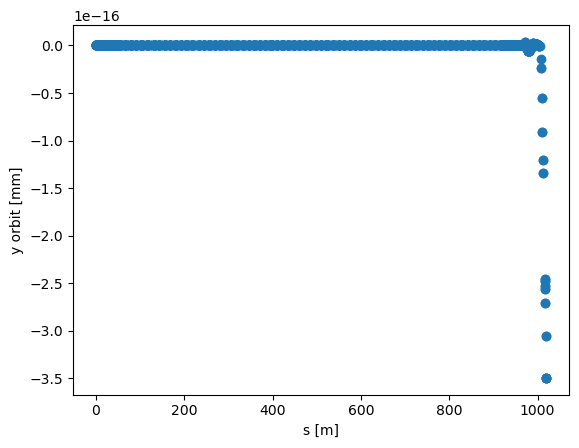

In [8]:
fig, ax = plt.subplots()
ax.scatter(
    [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
    [ tao.ele_orbit(eleII)["x"] for eleII in range(totalNumElements) ]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("x orbit [mm]")
plt.show()


fig, ax = plt.subplots()
ax.scatter(
    [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
    [ tao.ele_orbit(eleII)["y"] for eleII in range(totalNumElements) ]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("y orbit [mm]")
plt.show()

BEGBC14_1


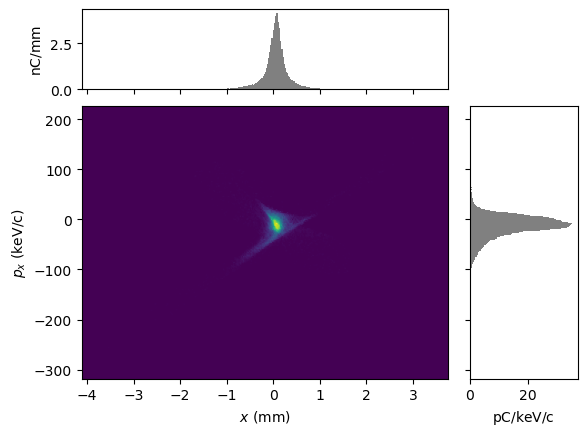

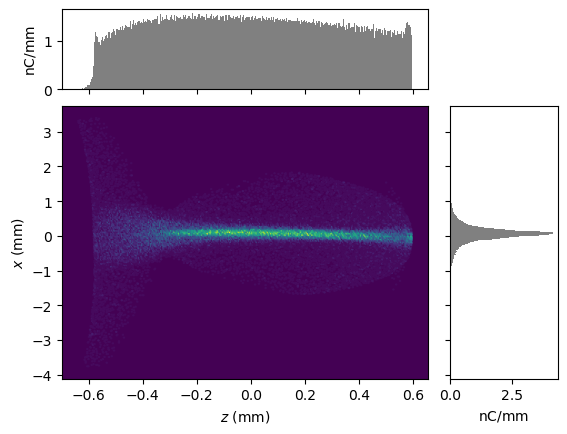

Q19501


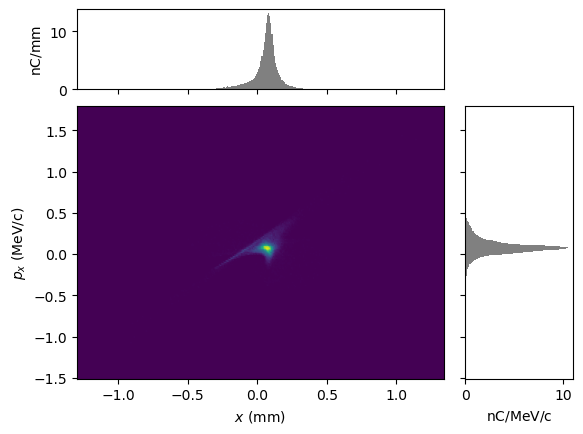

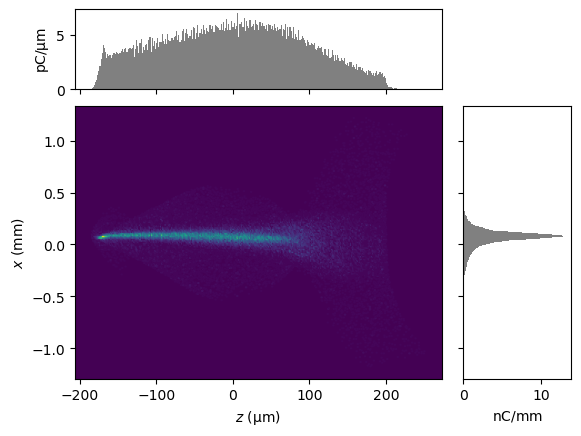

In [9]:
for activeEle in  [ "BEGBC14_1", "Q19501" ]:
    print(activeEle)
    P = getBeamAtElement(tao, activeEle)
    display(plotMod(P, 'x', 'px',  bins=300))
    display(plotMod(P, 'z', 'x',  bins=300))
    plt.clf()

## Introduce linac error

In [20]:
#Prevent recalculation until changes are made
tao.cmd("set global lattice_calc_on = F")


for ele in linacsToPerturb:
    tao.cmd(f"set ele {ele} X_OFFSET = {5e-3}")



#Prevent recalculation until changes are made
tao.cmd("set global lattice_calc_on = T")

[]

In [21]:
trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_4110266557001429250.h5
Set track_start = L0AFEND, track_end = Q19501
Set track_end = ENDDL10
Tracking!
Beam centered at ENDDL10 written to /tmp/beams/patchBeamFile_4110266557001429250.h5
Loaded /tmp/beams/patchBeamFile_4110266557001429250.h5
Set track_start = ENDDL10, track_end = Q19501
Tracking!
trackBeam() exiting


In [22]:
activeData = {}
for activeEle in  [ "PR10571", "WS12214", "BEGBC14_1", "ENDBC14_2", "Q19501" ]:
    # print(activeEle)
    # print(f"""{getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6:.2f}, {getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6:.2f}""")
    # print()
    activeData[f"{activeEle}_x"] = getBeamAtElement(tao, activeEle).twiss(plane = "x", fraction = 0.9)["norm_emit_x"] * 1e6
    activeData[f"{activeEle}_y"] = getBeamAtElement(tao, activeEle).twiss(plane = "y", fraction = 0.9)["norm_emit_y"] * 1e6

printableData = { key : f"""{activeData[key]:.2f}""" for key in activeData.keys() }

print(tabulate([
    ["PR10571",                  printableData["PR10571_x"], printableData["PR10571_y"]], 
    ["WS12214",                  printableData["WS12214_x"], printableData["WS12214_y"]],
    ["BEGBC14",                  printableData["BEGBC14_1_x"], printableData["BEGBC14_1_y"]],
    ["ENDBC14",                  printableData["ENDBC14_2_x"], printableData["ENDBC14_2_y"]],
    ["Q19501\n(L3 wire proxy)", printableData["Q19501_x"], printableData["Q19501_y"]]
], 
["90% RMS\nemittance (not\nSI90!) [um-rad]", "\n     X     ", "\n     Y     "], 
tablefmt="grid"))

+-------------------+---------------+---------------+
| 90% RMS           |               |               |
| emittance (not    |        X      |        Y      |
| SI90!) [um-rad]   |               |               |
+===================+===============+===============+
| PR10571           |          3.93 |          2.87 |
+-------------------+---------------+---------------+
| WS12214           |         14.51 |          2.75 |
+-------------------+---------------+---------------+
| BEGBC14           |         25.37 |          2.72 |
+-------------------+---------------+---------------+
| ENDBC14           |         19.54 |          2.72 |
+-------------------+---------------+---------------+
| Q19501            |         16.62 |          3.73 |
| (L3 wire proxy)   |               |               |
+-------------------+---------------+---------------+


<Figure size 640x480 with 0 Axes>

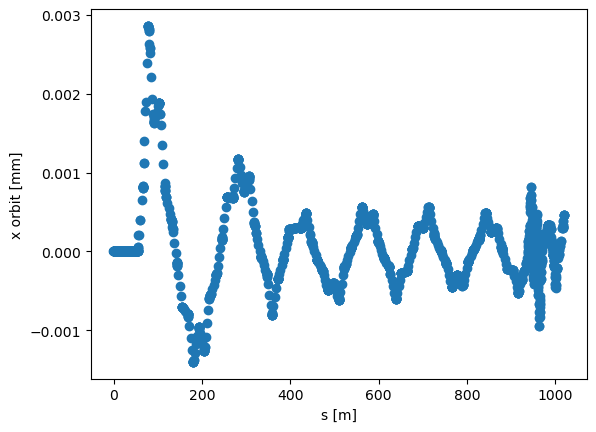

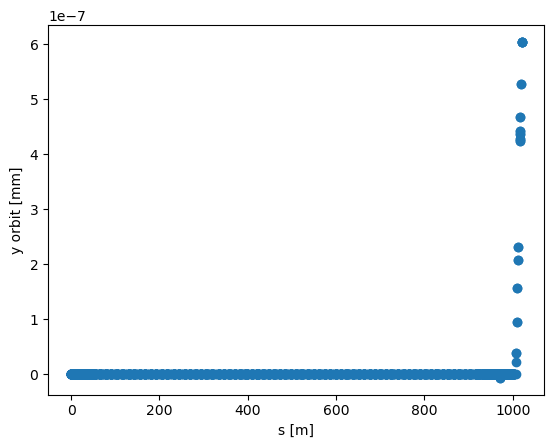

In [23]:
fig, ax = plt.subplots()
ax.scatter(
    [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
    [ tao.ele_orbit(eleII)["x"] for eleII in range(totalNumElements) ]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("x orbit [mm]")
plt.show()


fig, ax = plt.subplots()
ax.scatter(
    [ tao.ele_head(eleII)["s"] for eleII in range(totalNumElements) ],
    [ tao.ele_orbit(eleII)["y"] for eleII in range(totalNumElements) ]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("y orbit [mm]")
plt.show()

BEGBC14_1


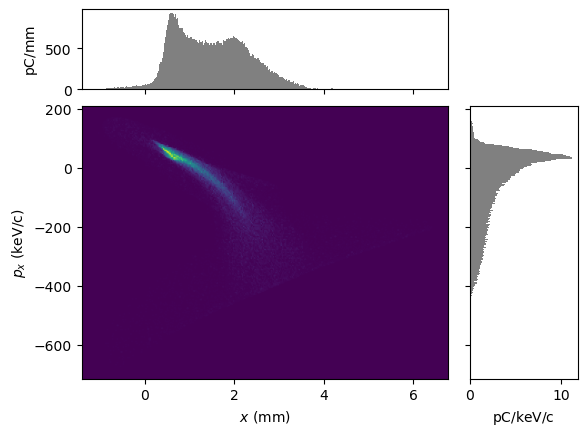

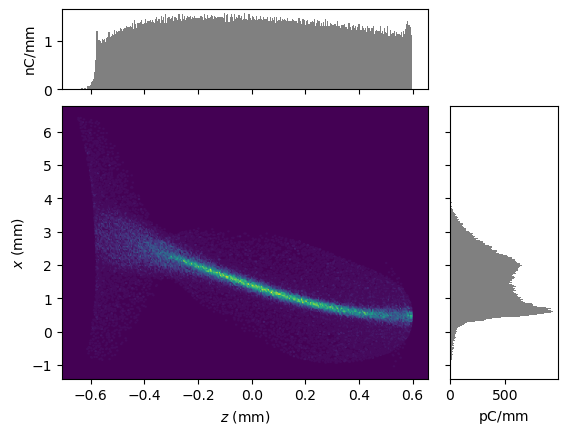

Q19501


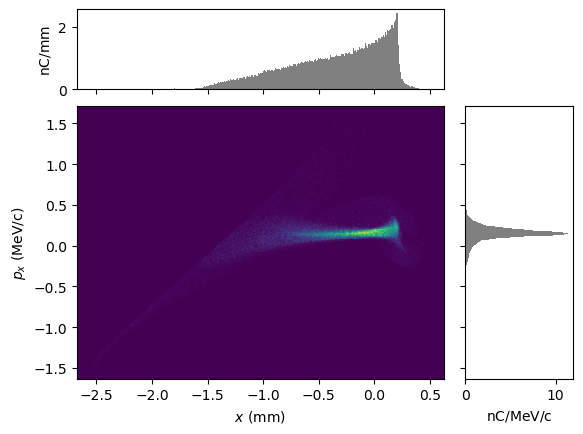

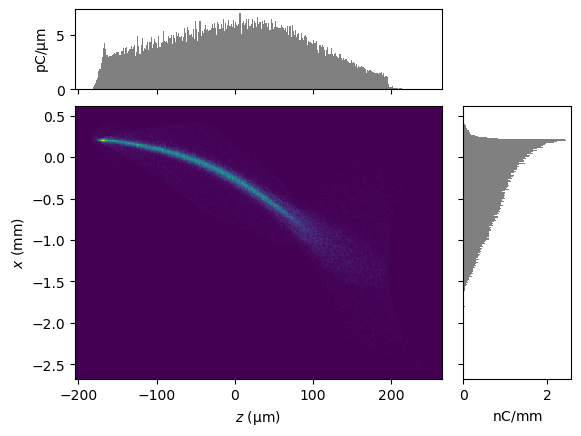

In [24]:
for activeEle in  [ "BEGBC14_1", "Q19501" ]:
    print(activeEle)
    P = getBeamAtElement(tao, activeEle)
    display(plotMod(P, 'x', 'px',  bins=300))
    display(plotMod(P, 'z', 'x',  bins=300))
    plt.clf()

BEGBC14_1


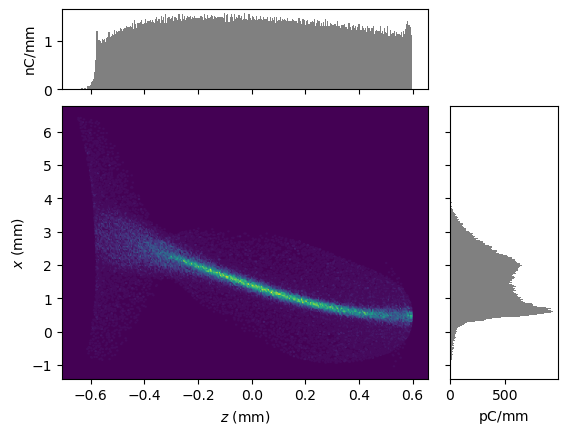

ENDBC14_2


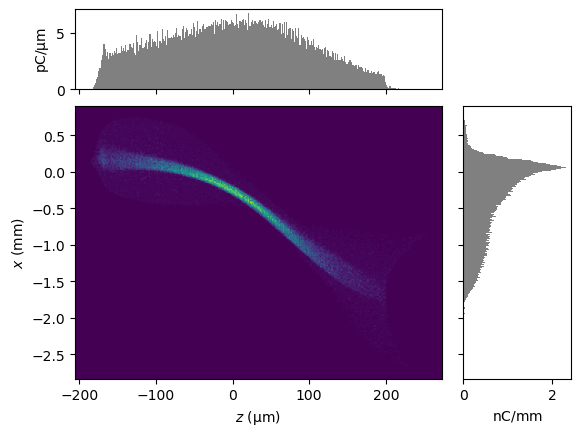

Q19501


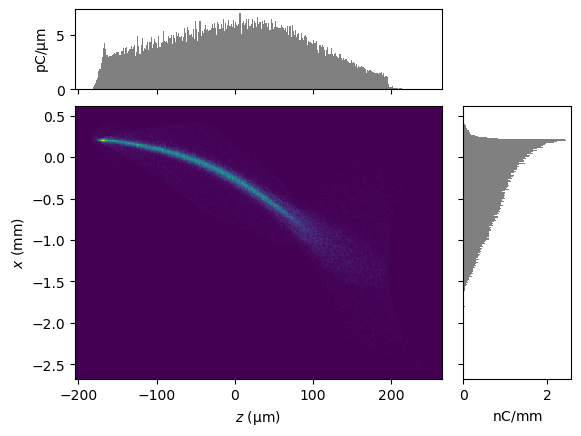

In [27]:
for activeEle in  [ "BEGBC14_1", "ENDBC14_2", "Q19501" ]:
    print(activeEle)
    P = getBeamAtElement(tao, activeEle)
    display(plotMod(P, 'z', 'x',  bins=300))
    plt.clf()

In [31]:
combinedElementData = [
    {
        "eleII" : eleII,
        "name" : tao.ele_head(eleII)["name"],
        "key" : tao.ele_head(eleII)["key"],
        "s" : tao.ele_head(eleII)["s"]
    }
    for eleII in range(totalNumElements) 
]

#Keep only elements after L0AFEND
combinedElementData = [ele for ele in combinedElementData if ele["s"] > 4.1274477]



selectedMarkerDicts     = [ eleDict for eleDict in combinedElementData if eleDict["key"] == "Marker"]
selectedMarkerDicts     = [ eleDict for eleDict in selectedMarkerDicts if tao.ele_head("L0AFEND")["s"]    < tao.ele_head(eleDict["eleII"])["s"] < tao.ele_head(evalElement)["s"]   ]

selectedMarkerII = [ eleDict["eleII"] for eleDict in selectedMarkerDicts ]

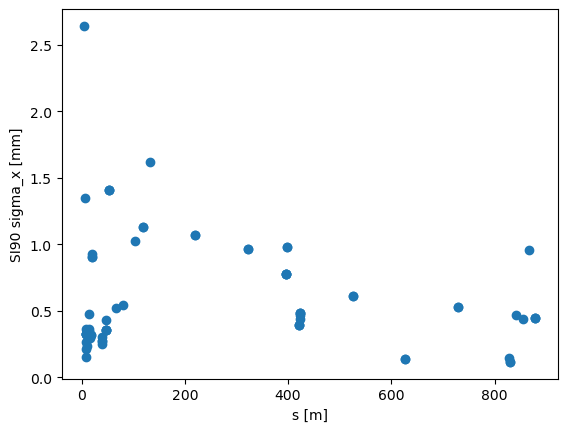

In [34]:
fig, ax = plt.subplots()
ax.scatter(
    [ tao.ele_head(eleII)["s"] for eleII in selectedMarkerII ],
    [ 1e3 * smallestIntervalImpliedSigma( getBeamAtElement(tao, eleII).x ) for eleII in selectedMarkerII ]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("SI90 sigma_x [mm]")
plt.show()

/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:530: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)
/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:561: RuntimeWarning: invalid value encountered in sqrt
  emit_opt = np.sqrt( sigmax_opt**2 * sigmaxp_opt**2 - (rho_opt * sigmax_opt * sigmaxp_opt)**2 )


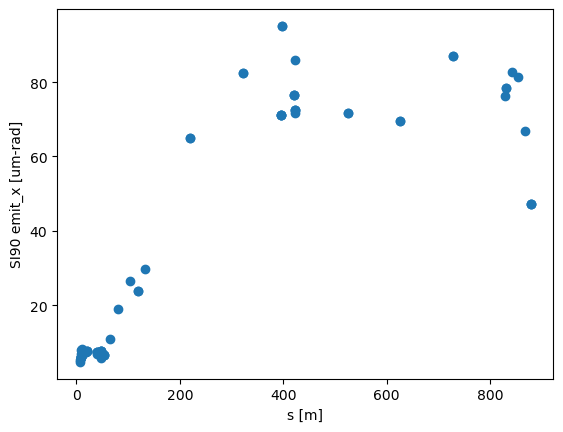

In [35]:
fig, ax = plt.subplots()
ax.scatter(
    [ tao.ele_head(eleII)["s"] for eleII in selectedMarkerII ],
    [ 1e6 * smallestIntervalImpliedEmittance( getBeamAtElement(tao, eleII) ) for eleII in selectedMarkerII ]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("SI90 emit_x [um-rad]")
plt.show()

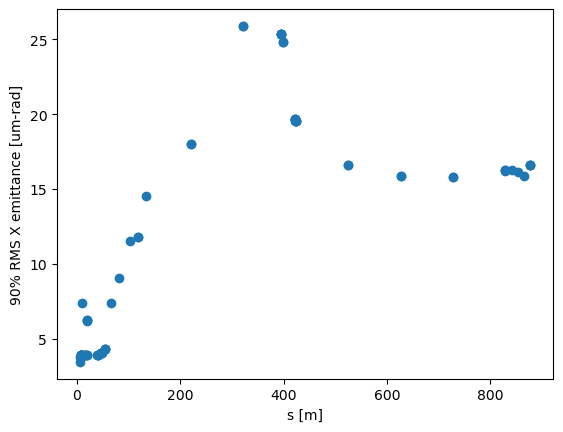

In [37]:
fig, ax = plt.subplots()
ax.scatter(
    [ tao.ele_head(eleII)["s"] for eleII in selectedMarkerII ],
    [ 1e6 * ((getBeamAtElement(tao, eleII)).twiss(plane = "x", fraction = 0.9))["norm_emit_x"] for eleII in selectedMarkerII ]
)


ax.set_xlabel("s [m]")
ax.set_ylabel("90% RMS X emittance [um-rad]")
plt.show()